###import required packages

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

In [2]:
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

<Figure size 432x216 with 0 Axes>

In [3]:
from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
import sklearn

In [5]:
print(sklearn.__version__)

0.23.2


In [6]:
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder


In [7]:
#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


In [8]:
#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


In [9]:
#Modules related to saving python objects permanantly
#from sklearn.externals import joblib
import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")


In [10]:
#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [11]:
data=pd.read_csv('bank-additional.csv',sep=';')

In [12]:
data.tail()

age         job  marital    education default housing loan    contact  \
4114   30      admin.  married     basic.6y      no     yes  yes   cellular   
4115   39      admin.  married  high.school      no     yes   no  telephone   
4116   27     student   single  high.school      no      no   no   cellular   
4117   58      admin.  married  high.school      no      no   no   cellular   
4118   34  management   single  high.school      no     yes   no   cellular   

     month day_of_week  ...  campaign  pdays  previous     poutcome  \
4114   jul         thu  ...         1    999         0  nonexistent   
4115   jul         fri  ...         1    999         0  nonexistent   
4116   may         mon  ...         2    999         1      failure   
4117   aug         fri  ...         1    999         0  nonexistent   
4118   nov         wed  ...         1    999         0  nonexistent   

     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
4114          1.4          93.918          -42.7      4.958       5228.1  no  
4115          1.4          93.918          -42.7      4.959       5228.1  no  
4116         -1.8          92.893          -46.2      1.354       5099.1  no  
4117          1.4          93.444          -36.1      4.966       5228.1  no  
4118         -0.1          93.200          -42.0      4.120       5195.8  no  

[5 rows x 21 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [14]:
data.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

In [15]:
profile_report=pandas_profiling.ProfileReport(data)
#We willstart the EDA here


In [16]:
profile_report

In [17]:
profile_report.to_file('profile_report.html')

In [18]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
data.y.value_counts()/data.y.count()
#89% NO and 11% yes

no     0.890507
yes    0.109493
Name: y, dtype: float64

In [20]:
data.groupby('y').mean()

age   duration  campaign       pdays  previous  emp.var.rate  \
y                                                                         
no   39.895311  219.40976  2.605780  982.763086  0.141767      0.240185   
yes  41.889135  560.78714  1.980044  778.722838  0.585366     -1.177384   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.599677     -40.586723   3.802826  5175.502072  
yes       93.417268     -39.786475   2.145448  5093.118625

In [21]:
#### Dropping the variables based on the data audit report (near zero variance, high missing, higly correlated variables, business logic)

In [22]:
data.drop(['euribor3m', 'nr.employed', 'default', 'pdays', 'cons.price.idx'], axis=1, inplace=True)

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [26]:
#Renaming the columsns by replacing special characters with underscore
data.columns = [ i.replace('.', '_') for i in data.columns]

In [27]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp_var_rate', 'cons_conf_idx', 'y'],
      dtype='object')

In [28]:
#saperate categorical and numeric columns
data_cat = data[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]
data_num = data[['age', 'campaign', 'previous', 'emp_var_rate','duration', 'cons_conf_idx']]

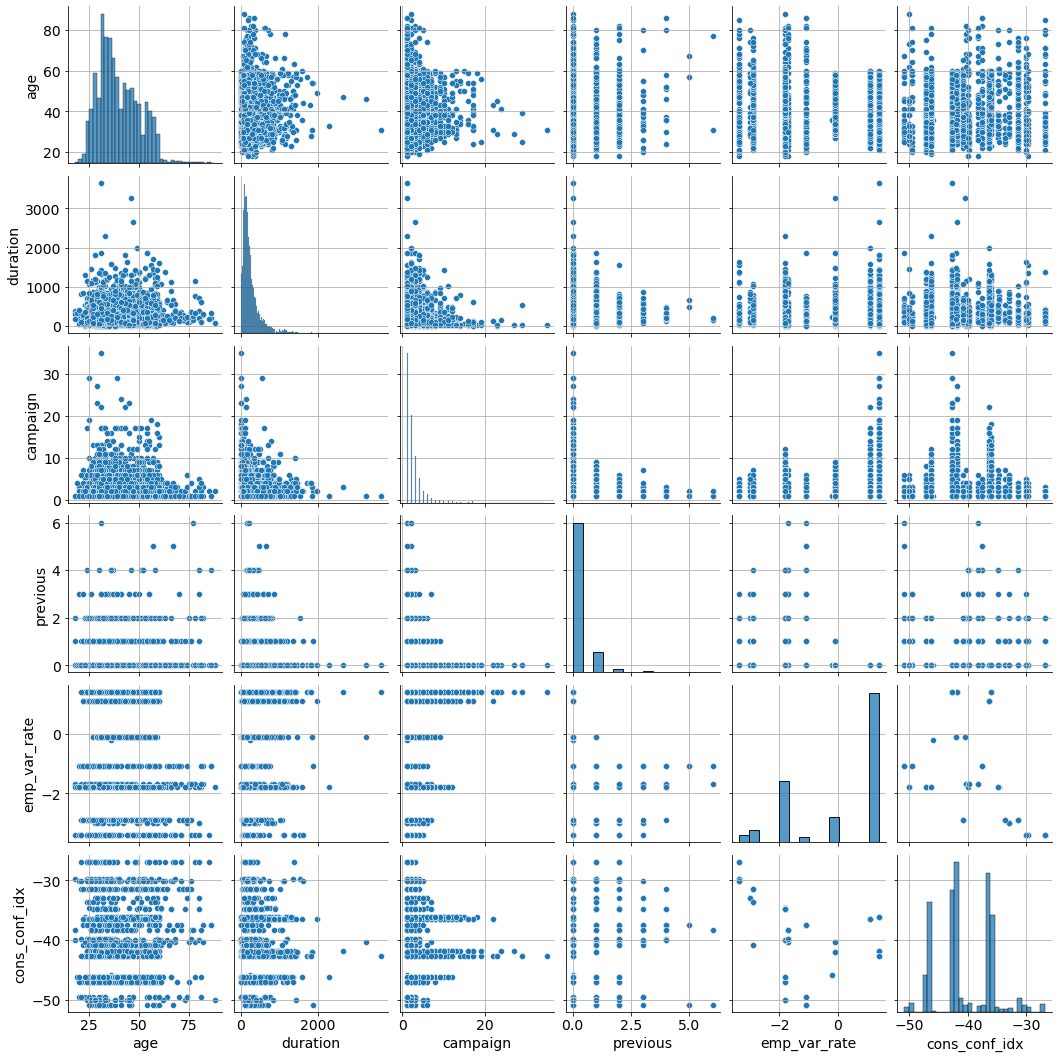

In [29]:
sns.pairplot(data,kind='scatter')

#no correltions observed

In [30]:
# Creating Data audit Report
# Use a general function that returns multiple values
def num_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [31]:
data_num_summary=data_num.apply(lambda x: num_summary(x))

In [32]:
data_num_summary.T

N  NMISS        SUM        MEAN  MEDIAN         STD  \
age            4119.0    0.0   165228.0   40.113620    38.0   10.313362   
campaign       4119.0    0.0    10451.0    2.537266     2.0    2.568159   
previous       4119.0    0.0      784.0    0.190337     0.0    0.541788   
emp_var_rate   4119.0    0.0      350.0    0.084972     1.1    1.563114   
duration       4119.0    0.0  1057710.0  256.788055   181.0  254.703736   
cons_conf_idx  4119.0    0.0  -166815.8  -40.499102   -41.8    4.594578   

                        VAR   MIN    P1    P5   P10    P25    P50    P75  \
age              106.365426  18.0  24.0  26.0  28.8   32.0   38.0   47.0   
campaign           6.595442   1.0   1.0   1.0   1.0    1.0    2.0    3.0   
previous           0.293535   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
emp_var_rate       2.443327  -3.4  -3.4  -2.9  -1.8   -1.8    1.1    1.4   
duration       64873.993194   0.0  11.0  35.0  60.0  103.0  181.0  317.0   
cons_conf_idx     21.110142 -50.8 -50.0 -47.1 -46.2  -42.7  -41.8  -36.4   

                 P90    P95      P99     MAX  
age             55.0   58.0    68.00    88.0  
campaign         5.0    7.0    13.00    35.0  
previous         1.0    1.0     3.00     6.0  
emp_var_rate     1.4    1.4     1.40     1.4  
duration       545.2  740.2  1231.66  3643.0  
cons_conf_idx  -36.1  -33.6   -26.90   -26.9

#similarly we need to handle the categorical variables, convert them to one-hot encoded values

In [33]:
data_new = pd.get_dummies(data, data_cat.columns, drop_first=True)

In [34]:
data_new.columns = [ i.replace('.', '_') for i in data_new.columns]

In [35]:
data_new.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [36]:
data_new.shape

(4119, 48)

<AxesSubplot:>

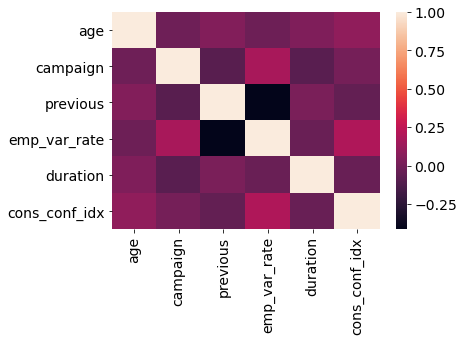

In [37]:
sns.heatmap(data_num.corr())

<AxesSubplot:>

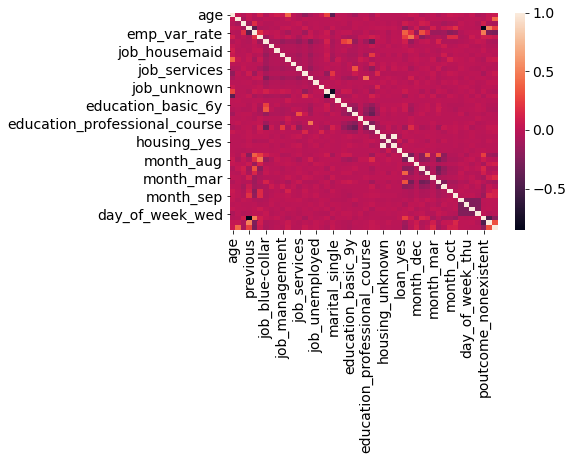

In [38]:
sns.heatmap(data_new.corr())

# variable reduction (feature selection/reduction)
#Univariate Regression
#WOE - Binomial classification
#RFE - Recursive Feature Elimination - This might mislead you if the data have multicollinieirity
#SelectKBest
#VIF
#PCA

In [39]:
data_new.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [40]:
X = data_new[data_new.columns.difference(['y_yes'])]

In [41]:
X

age  campaign  cons_conf_idx  contact_telephone  day_of_week_mon  \
0      30         2          -46.2                  0                0   
1      39         4          -36.4                  1                0   
2      25         1          -41.8                  1                0   
3      38         3          -41.8                  1                0   
4      47         1          -42.0                  0                1   
...   ...       ...            ...                ...              ...   
4114   30         1          -42.7                  0                0   
4115   39         1          -42.7                  1                0   
4116   27         2          -46.2                  0                1   
4117   58         1          -36.1                  0                0   
4118   34         1          -42.0                  0                0   

      day_of_week_thu  day_of_week_tue  day_of_week_wed  duration  \
0                   0                0                0       487   
1                   0                0                0       346   
2                   0                0                1       227   
3                   0                0                0        17   
4                   0                0                0        58   
...               ...              ...              ...       ...   
4114                1                0                0        53   
4115                0                0                0       219   
4116                0                0                0        64   
4117                0                0                0       528   
4118                0                0                1       175   

      education_basic_6y  ...  month_jul  month_jun  month_mar  month_may  \
0                      0  ...          0          0          0          1   
1                      0  ...          0          0          0          1   
2                      0  ...          0          1          0          0   
3                      0  ...          0          1          0          0   
4                      0  ...          0          0          0          0   
...                  ...  ...        ...        ...        ...        ...   
4114                   1  ...          1          0          0          0   
4115                   0  ...          1          0          0          0   
4116                   0  ...          0          0          0          1   
4117                   0  ...          0          0          0          0   
4118                   0  ...          0          0          0          0   

      month_nov  month_oct  month_sep  poutcome_nonexistent  poutcome_success  \
0             0          0          0                     1                 0   
1             0          0          0                     1                 0   
2             0          0          0                     1                 0   
3             0          0          0                     1                 0   
4             1          0          0                     1                 0   
...         ...        ...        ...                   ...               ...   
4114          0          0          0                     1                 0   
4115          0          0          0                     1                 0   
4116          0          0          0                     0                 0   
4117          0          0          0                     1                 0   
4118          1          0          0                     1                 0   

      previous  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
4114         0  
4115         0  
4116         1  
4117         0  
4118         0  

[4119 rows x 47 columns]

In [42]:
y=data_new[['y_yes']]

In [43]:
y

y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4114      0
4115      0
4116      0
4117      0
4118      0

[4119 rows x 1 columns]

In [44]:
y.value_counts

<bound method DataFrame.value_counts of       y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4114      0
4115      0
4116      0
4117      0
4118      0

[4119 rows x 1 columns]>

In [45]:
y.values.sum()

451

In [46]:
y.values.max()

1

In [47]:
classifier = RandomForestClassifier()
rfe = RFE(classifier, 15)
rfe = rfe.fit(X, y )

In [48]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True])

In [49]:
X.columns[rfe.support_]

Index(['age', 'campaign', 'cons_conf_idx', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'duration',
       'education_high_school', 'education_university_degree', 'emp_var_rate',
       'housing_yes', 'job_technician', 'marital_married', 'poutcome_success',
       'previous'],
      dtype='object')

In [50]:
imp_vars_rfe=list(X.columns[rfe.support_])

In [51]:
imp_vars_rfe

['age',
 'campaign',
 'cons_conf_idx',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'duration',
 'education_high_school',
 'education_university_degree',
 'emp_var_rate',
 'housing_yes',
 'job_technician',
 'marital_married',
 'poutcome_success',
 'previous']

we will select these features

# Select K-best

In [52]:
skb=SelectKBest?

In [ ]:
skb=SelectKBest

In [53]:
skb=SelectKBest(f_classif,k=15).fit(X,y)

In [54]:
skb.get_support()

array([ True,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True])

In [55]:
X.columns[skb.get_support()]

Index(['age', 'campaign', 'contact_telephone', 'duration', 'emp_var_rate',
       'job_blue-collar', 'job_retired', 'month_dec', 'month_mar', 'month_may',
       'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success',
       'previous'],
      dtype='object')

In [56]:
imp_vars_skb=list(X.columns[skb.get_support()])

In [57]:
imp_vars_skb

['age',
 'campaign',
 'contact_telephone',
 'duration',
 'emp_var_rate',
 'job_blue-collar',
 'job_retired',
 'month_dec',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous']

In [58]:
final_list=list(set(imp_vars_rfe+imp_vars_skb))

In [59]:
final_list

['month_mar',
 'day_of_week_mon',
 'day_of_week_tue',
 'month_oct',
 'previous',
 'duration',
 'job_technician',
 'education_high_school',
 'age',
 'emp_var_rate',
 'poutcome_nonexistent',
 'job_retired',
 'job_blue-collar',
 'marital_married',
 'poutcome_success',
 'month_dec',
 'month_sep',
 'day_of_week_thu',
 'education_university_degree',
 'campaign',
 'cons_conf_idx',
 'contact_telephone',
 'month_may',
 'housing_yes']

In [60]:
len(final_list)

24

In [61]:
X=data_new[final_list]

In [62]:
X.shape

(4119, 24)

In [63]:
y

y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4114      0
4115      0
4116      0
4117      0
4118      0

[4119 rows x 1 columns]

In [64]:
y.shape

(4119, 1)

In [65]:
from matplotlib.backends.backend_pdf import PdfPages

In [66]:
max_bin = 20
force_bin = 3

In [67]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [68]:
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [69]:
final_iv, IV = data_vars(data_new,data_new.y_yes)

In [70]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0                     age       18.0       38.0   2106  224.0    0.106363   
1                     age       39.0       88.0   2013  227.0    0.112767   
2                duration        0.0       57.0    383    0.0    0.000000   
3                duration       58.0       84.0    367    4.0    0.010899   
4                duration       85.0      111.0    380    8.0    0.021053   
..                    ...        ...        ...    ...    ...         ...   
98        day_of_week_wed        1.0        1.0    795   83.0    0.104403   
99   poutcome_nonexistent        0.0        0.0    596  159.0    0.266779   
100  poutcome_nonexistent        1.0        1.0   3523  292.0    0.082884   
101      poutcome_success        0.0        0.0   3977  359.0    0.090269   
102      poutcome_success        1.0        1.0    142   92.0    0.647887   

     NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0      1882.0        0.893637    0.496674        0.513086 -0.032510  0.001078  
1      1786.0        0.887233    0.503326        0.486914  0.033151  0.001078  
2       383.0        1.000000    0.000000        0.104417  0.000000  1.308591  
3       363.0        0.989101    0.008869        0.098964 -2.412174  1.308591  
4       372.0        0.978947    0.017738        0.101418 -1.743518  1.308591  
..        ...             ...         ...             ...       ...       ...  
98      712.0        0.895597    0.184035        0.194111 -0.053303  0.000662  
99      437.0        0.733221    0.352550        0.119138  1.084906  0.325087  
100    3231.0        0.917116    0.647450        0.880862 -0.307859  0.325087  
101    3618.0        0.909731    0.796009        0.986369 -0.214420  0.555873  
102      50.0        0.352113    0.203991        0.013631  2.705700  0.555873  

[103 rows x 12 columns]

In [71]:
IV.sort_values('IV')

VAR_NAME            IV
12           education_illiterate  7.433623e-08
6                 day_of_week_tue  4.494724e-05
29                    job_unknown  4.965185e-05
18                    housing_yes  8.551049e-05
34                marital_unknown  1.054421e-04
5                 day_of_week_thu  1.257734e-04
21                  job_housemaid  2.702862e-04
11          education_high_school  5.337944e-04
7                 day_of_week_wed  6.622589e-04
4                 day_of_week_mon  7.137375e-04
27                 job_technician  8.204952e-04
0                             age  1.077627e-03
31                       loan_yes  1.086684e-03
35                      month_aug  1.555437e-03
30                   loan_unknown  1.725446e-03
17                housing_unknown  1.725446e-03
13  education_professional_course  2.176065e-03
41                      month_nov  2.294856e-03
22                 job_management  2.742593e-03
24              job_self-employed  3.667953e-03
25                   job_services  5.022217e-03
38                      month_jun  5.180002e-03
15              education_unknown  8.172520e-03
9              education_basic_6y  8.795489e-03
28                 job_unemployed  9.140927e-03
32                marital_married  1.321397e-02
20               job_entrepreneur  1.608389e-02
37                      month_jul  1.699366e-02
14    education_university_degree  1.980898e-02
26                    job_student  2.303054e-02
10             education_basic_9y  2.341642e-02
33                 marital_single  2.413893e-02
1                        campaign  2.928579e-02
23                    job_retired  4.610251e-02
19                job_blue-collar  5.479959e-02
36                      month_dec  5.498645e-02
42                      month_oct  6.843807e-02
43                      month_sep  8.348584e-02
2                   cons_conf_idx  1.107938e-01
40                      month_may  1.174899e-01
39                      month_mar  1.410715e-01
3               contact_telephone  2.324898e-01
16                   emp_var_rate  2.385938e-01
46                       previous  2.567242e-01
44           poutcome_nonexistent  3.250870e-01
45               poutcome_success  5.558732e-01
8                        duration  1.308591e+00

# VIF

In [72]:
X_new = X[X.columns.difference([ 'age', 'cons_conf_idx','poutcome_nonexistent', 'month_may'])]
#X_new =  X[X.columns.difference(['cons_conf_idx', 'age', 'poutcome_nonexistent'])]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

print(vif)

    VIF Factor                     features
0     1.880490                     campaign
1     1.750026            contact_telephone
2     1.444406              day_of_week_mon
3     1.427533              day_of_week_thu
4     1.428614              day_of_week_tue
5     1.835839                     duration
6     1.440239        education_high_school
7     1.678582  education_university_degree
8     1.511089                 emp_var_rate
9     1.923638                  housing_yes
10    1.554063              job_blue-collar
11    1.112436                  job_retired
12    1.249747               job_technician
13    2.293164              marital_married
14    1.036596                    month_dec
15    1.046322                    month_mar
16    1.091227                    month_oct
17    1.086689                    month_sep
18    1.421203             poutcome_success
19    1.728195                     previous


#split data in train and test

In [73]:
data_new.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [86]:
data_new.columns = [ i.replace('-', '_') for i in data_new.columns]

In [87]:
y = data_new[['y_yes']]
X=data_new.drop(['y_yes'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=123)
X_train.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [88]:
X_train.shape

(2883, 47)

In [89]:
X_test.shape

(1236, 47)

In [90]:
y_train.shape

(2883, 1)

In [91]:
y_test.shape

(1236, 1)

# Logistic Regression Using Stats Models (Traiditional Approach)

In [92]:
train, test = train_test_split(data_new, test_size=0.3, random_state=0)


In [93]:
train.shape

(2883, 48)

In [94]:
test.shape

(1236, 48)

In [95]:
data_new.columns.shape

(48,)

In [96]:
s=''
for i in list(train.columns):
    s=s+i+'+'
print(s)

age+duration+campaign+previous+emp_var_rate+cons_conf_idx+job_blue_collar+job_entrepreneur+job_housemaid+job_management+job_retired+job_self_employed+job_services+job_student+job_technician+job_unemployed+job_unknown+marital_married+marital_single+marital_unknown+education_basic_6y+education_basic_9y+education_high_school+education_illiterate+education_professional_course+education_university_degree+education_unknown+housing_unknown+housing_yes+loan_unknown+loan_yes+contact_telephone+month_aug+month_dec+month_jul+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+poutcome_nonexistent+poutcome_success+y_yes+


In [ ]:
#data_new.columns = [ i.replace('.', '_') for i in data_new.columns]


In [98]:
logreg = smf.logit(formula='y_yes~age+duration+campaign+previous+emp_var_rate+cons_conf_idx+job_blue_collar+job_entrepreneur+job_housemaid+job_management+job_retired+job_self_employed+job_services+job_student+job_technician+job_unemployed+job_unknown+marital_married+marital_single+marital_unknown+education_basic_6y+education_basic_9y+education_high_school+education_illiterate+education_professional_course+education_university_degree+education_unknown+housing_unknown+housing_yes+loan_unknown+loan_yes+contact_telephone+month_aug+month_dec+month_jul+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+poutcome_nonexistent+poutcome_success', data=train)
result = logreg.fit()

         Current function value: 0.189161
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [101]:
print(result.summary2())

                                      Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.467      
Dependent Variable:         y_yes                    AIC:                      1184.7046  
Date:                       2020-10-02 13:51         BIC:                      1465.1342  
No. Observations:           2883                     Log-Likelihood:           -545.35    
Df Model:                   46                       LL-Null:                  -1023.6    
Df Residuals:               2836                     LLR p-value:              1.7080e-170
Converged:                  0.0000                   Scale:                    1.0000     
No. Iterations:             35.0000                                                       
------------------------------------------------------------------------------------------
                               Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
-------------------------------------

We need to drop all the features with p value > 0.05

# Accuracy score using gini and ROC

In [103]:
train_gini = 2*metrics.roc_auc_score(train['y_yes'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['y_yes'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['y_yes'], result.predict(train))
test_auc = metrics.roc_auc_score(test['y_yes'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.8961971566146911
The Gini Index for the model built on the Test Data is :  0.8019836948524
The AUC for the model built on the Train Data is :  0.9480985783073456
The AUC for the model built on the Test Data is :  0.9009918474262


In [107]:
##ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['y_yes']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict[train_predict['actual']>0]

actual      prob
228        1  0.803838
2012       1  0.195156
3462       1  0.535191
3139       1  0.745935
53         1  0.783323
...      ...       ...
639        1  0.814789
1871       1  0.723389
705        1  0.904991
1653       1  0.611532
2732       1  0.274559

[329 rows x 2 columns]

In [115]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['y_yes']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

actual      prob
3754       0  0.009808
45         0  0.162149
2774       0  0.088727
1170       0  0.076772
4042       0  0.013923

In [108]:
##ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [109]:
roc_like_df

cutoff  sensitivity  specificity  accuracy
0  0.000000     1.000000     0.000000  0.114117
0  0.020408     0.996960     0.561864  0.611516
0  0.040816     0.978723     0.740016  0.767256
0  0.061224     0.957447     0.805012  0.822407
0  0.081633     0.930091     0.835161  0.845994
0  0.102041     0.905775     0.855129  0.860909
0  0.122449     0.887538     0.875098  0.876518
0  0.142857     0.857143     0.888019  0.884495
0  0.163265     0.835866     0.898199  0.891086
0  0.183673     0.808511     0.912686  0.900798
0  0.204082     0.778116     0.920125  0.903920
0  0.224490     0.762918     0.926782  0.908082
0  0.244898     0.747720     0.931480  0.910510
0  0.265306     0.732523     0.938919  0.915366
0  0.285714     0.708207     0.944009  0.917100
0  0.306122     0.686930     0.947925  0.918141
0  0.326531     0.656535     0.951840  0.918141
0  0.346939     0.641337     0.956147  0.920222
0  0.367347     0.620061     0.958496  0.919875
0  0.387755     0.601824     0.962020  0.920916
0  0.408163     0.580547     0.965153  0.921263
0  0.428571     0.559271     0.967894  0.921263
0  0.448980     0.556231     0.970243  0.922997
0  0.469388     0.534954     0.971026  0.921263
0  0.489796     0.510638     0.972592  0.919875
0  0.510204     0.477204     0.974941  0.918141
0  0.530612     0.468085     0.976899  0.918835
0  0.551020     0.452888     0.978074  0.918141
0  0.571429     0.443769     0.979640  0.918488
0  0.591837     0.425532     0.980423  0.917100
0  0.612245     0.416413     0.980814  0.916407
0  0.632653     0.398176     0.982772  0.916060
0  0.653061     0.382979     0.983947  0.915366
0  0.673469     0.379939     0.985513  0.916407
0  0.693878     0.355623     0.987079  0.915019
0  0.714286     0.334347     0.988645  0.913978
0  0.734694     0.303951     0.989428  0.911204
0  0.755102     0.279635     0.990603  0.909469
0  0.775510     0.261398     0.990995  0.907735
0  0.795918     0.234043     0.992561  0.906001
0  0.816327     0.206687     0.993344  0.903573
0  0.836735     0.188450     0.994127  0.902185
0  0.857143     0.179331     0.994518  0.901492
0  0.877551     0.170213     0.995693  0.901492
0  0.897959     0.148936     0.996476  0.899757
0  0.918367     0.130699     0.997651  0.898717
0  0.938776     0.109422     0.998042  0.896635
0  0.959184     0.079027     0.998825  0.893861
0  0.979592     0.045593     0.999217  0.890392
0  1.000000     0.000000     1.000000  0.885883

In [110]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [111]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.081633     0.930091     0.835161  0.845994  1.765252

In [112]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.44898     0.556231     0.970243  0.922997  1.526474

In [113]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

cutoff  sensitivity  specificity  accuracy  total
0     0.0          1.0          0.0  0.114117    1.0

In [116]:
#Choosen Best Cut-off is 0.08 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.08 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.08 else 0)

In [117]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.8435657301422129
The overall accuracy score for the Test Data  is :  0.8179611650485437


In [118]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2554
           1       0.42      0.93      0.58       329

    accuracy                           0.84      2883
   macro avg       0.70      0.88      0.74      2883
weighted avg       0.92      0.84      0.87      2883



In [119]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1114
           1       0.34      0.86      0.48       122

    accuracy                           0.82      1236
   macro avg       0.66      0.84      0.69      1236
weighted avg       0.92      0.82      0.85      1236



# Decile Analysis

In [120]:
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


#Decile analysis for validation of models - Business validation

In [121]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

train_predict.head()

actual      prob  predicted  Deciles
4070       0  0.009572          0        2
1240       0  0.008758          0        2
349        0  0.005789          0        1
3706       0  0.019577          0        4
4043       0  0.005634          0        1

In [122]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

actual      prob  predicted  Deciles
3754       0  0.009808          0        3
45         0  0.162149          1        8
2774       0  0.088727          1        7
1170       0  0.076772          0        7
4042       0  0.013923          0        3

In [123]:
train_predict

actual      prob  predicted  Deciles
4070       0  0.009572          0        2
1240       0  0.008758          0        2
349        0  0.005789          0        1
3706       0  0.019577          0        4
4043       0  0.005634          0        1
...      ...       ...        ...      ...
1033       0  0.002019          0        0
3264       0  0.005726          0        1
1653       1  0.611532          1        9
2607       0  0.008419          0        2
2732       1  0.274559          1        8

[2883 rows x 4 columns]

In [124]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_1s

Deciles
9    194
8     92
7     31
6      8
5      3
4      1
3      0
2      0
1      0
0      0
Name: actual, dtype: uint8

In [125]:
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
no_total

Deciles
9    289
8    288
7    288
6    288
5    288
4    289
3    288
2    288
1    288
0    289
Name: actual, dtype: int64

In [126]:
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
max_prob

Deciles
9    1.000000
8    0.391422
7    0.135974
6    0.052974
5    0.030188
4    0.020489
3    0.014472
2    0.010799
1    0.007162
0    0.003875
Name: prob, dtype: float64

In [127]:
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']
min_prob

Deciles
9    3.918204e-01
8    1.373592e-01
7    5.304646e-02
6    3.019472e-02
5    2.049824e-02
4    1.447251e-02
3    1.079953e-02
2    7.176163e-03
1    3.874835e-03
0    1.002879e-11
Name: prob, dtype: float64

In [128]:
# Decile Analysis for train data

#no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
#no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
#max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
#min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [131]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train.columns=['max_prob','min_prob', 'no_1s','no_zeroes','no_total']
Decile_analysis_train

max_prob      min_prob  no_1s  no_zeroes  no_total
Deciles                                                    
9        1.000000  3.918204e-01    194         95       289
8        0.391422  1.373592e-01     92        196       288
7        0.135974  5.304646e-02     31        257       288
6        0.052974  3.019472e-02      8        280       288
5        0.030188  2.049824e-02      3        285       288
4        0.020489  1.447251e-02      1        288       289
3        0.014472  1.079953e-02      0        288       288
2        0.010799  7.176163e-03      0        288       288
1        0.007162  3.874835e-03      0        288       288
0        0.003875  1.002879e-11      0        289       289

In [132]:
# Decile Analysis for train data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)
Decile_analysis_test.columns=['max_prob','min_prob', 'no_1s','no_zeroes','no_total']


Decile_analysis_test

max_prob      min_prob  no_1s  no_zeroes  no_total
Deciles                                                    
9        0.999385  3.381694e-01     64         60       124
8        0.334340  1.398635e-01     28         95       123
7        0.137527  5.830497e-02     19        105       124
6        0.057704  3.500125e-02      6        117       123
5        0.034766  2.127759e-02      2        122       124
4        0.021224  1.409298e-02      0        123       123
3        0.013987  9.808249e-03      2        122       124
2        0.009754  6.267177e-03      0        123       123
1        0.006257  3.217103e-03      0        124       124
0        0.003210  3.182227e-11      1        123       124

# ### Logistic Regression using sklearn

In [135]:
model=LogisticRegression()

In [136]:
model.fit(X_train,y_train)
X_train['pred_prob'] = pd.DataFrame(model.predict_proba(X_train), index=X_train.index)[1]
X_test['pred_prob'] = pd.DataFrame(model.predict_proba(X_test),index=X_test.index)[1]
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train['pred'] = np.where(train.pred_prob>0.08, 1,0)
test['pred'] = np.where(test.pred_prob>0.08, 1,0)


In [137]:
train.head()

age  duration  campaign  previous  emp_var_rate  cons_conf_idx  \
929    41       142         2         0           1.4          -41.8   
776    29       281         2         0          -0.1          -42.0   
2469   30       111         2         0          -1.8          -46.2   
3645   33       578         1         0          -1.8          -46.2   
103    38       191         1         0          -1.8          -46.2   

      job_blue_collar  job_entrepreneur  job_housemaid  job_management  ...  \
929                 1                 0              0               0  ...   
776                 0                 0              0               0  ...   
2469                0                 0              0               0  ...   
3645                0                 0              0               1  ...   
103                 0                 0              0               0  ...   

      month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
929           0                0                1                0   
776           0                0                1                0   
2469          0                1                0                0   
3645          0                0                1                0   
103           0                0                0                0   

      day_of_week_wed  poutcome_nonexistent  poutcome_success  pred_prob  \
929                 0                     1                 0   0.014671   
776                 0                     1                 0   0.057675   
2469                0                     1                 0   0.032570   
3645                0                     1                 0   0.217892   
103                 0                     1                 0   0.050768   

      y_yes  pred  
929       0     0  
776       0     0  
2469      0     0  
3645      1     1  
103       0     0  

[5 rows x 50 columns]

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train.y_yes, train.pred)
print(confusion_matrix)

[[2091  485]
 [  21  286]]


In [139]:
print(metrics.classification_report(train.y_yes, train.pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2576
           1       0.37      0.93      0.53       307

    accuracy                           0.82      2883
   macro avg       0.68      0.87      0.71      2883
weighted avg       0.92      0.82      0.85      2883



In [140]:
print(metrics.classification_report(test.y_yes, test.pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1092
           1       0.40      0.91      0.56       144

    accuracy                           0.83      1236
   macro avg       0.69      0.87      0.73      1236
weighted avg       0.92      0.83      0.86      1236



# Performing logistic Regression using K-Fold validation manually

In [142]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.911


In [143]:
results

array([0.89965398, 0.88581315, 0.92733564, 0.9375    , 0.92013889,
       0.91319444, 0.88888889, 0.90972222, 0.92708333, 0.90277778])

# ### K-Nearest Neighbors


In [144]:
X_train.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'pred_prob'],
      dtype='object')

In [145]:
y_train.columns

Index(['y_yes'], dtype='object')

In [148]:
#KNN Model - Manually - with out standardization
model = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)

In [149]:
X_train['pred_prob'] = pd.DataFrame(model.predict_proba(X_train), index=X_train.index)[1]
X_test['pred_prob'] = pd.DataFrame(model.predict_proba(X_test),index=X_test.index)[1]

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train['pred'] = np.where(train.pred_prob>0.08, 1,0)
test['pred'] = np.where(test.pred_prob>0.08, 1,0)

In [150]:
2*metrics.roc_auc_score(train.y_yes, train.pred_prob)-1

1.0

In [151]:
2*metrics.roc_auc_score(test.y_yes, test.pred_prob)-1

0.5257427757427757

In [153]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(X_train)

In [154]:
std_data_train = pd.DataFrame(std_data, columns=X_train.columns, index = X_train.index )
std_data_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index = X_test.index )

In [155]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5)
model = model.fit(std_data_train, y_train )

In [156]:
model.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [161]:
model.best_score_

0.9559509195070287

In [162]:
train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [164]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883



In [165]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1092
           1       0.71      0.20      0.31       144

    accuracy                           0.90      1236
   macro avg       0.81      0.60      0.63      1236
weighted avg       0.88      0.90      0.87      1236



###  Decision Tree

In [167]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( X_train, y_train )

In [168]:
pred = pd.DataFrame(clf_tree.predict( X_train ), index=X_train.index)

In [169]:
tree_train_pred = pd.concat([y_train, pred], axis=1)

In [170]:
tree_train_pred.columns = ['actual', 'predicted']

In [171]:
pred_test = pd.DataFrame(clf_tree.predict( X_test ), index=X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']

In [172]:
print("Train Accuracy:")
print(metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test Accuracy:")
print(metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train Accuracy:
1.0
Test Accuracy:
0.8883495145631068


In [173]:
#### Fine Tuning the parameters

In [174]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [175]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [176]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring='f1')
tree.fit( X_train , y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])},
             scoring='f1')

In [177]:
tree.best_score_

0.2744283554425319

In [178]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=4)

In [179]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [180]:
train_pred = tree.predict(X_train)

In [181]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2576
           1       0.71      0.05      0.09       307

    accuracy                           0.90      2883
   macro avg       0.81      0.52      0.52      2883
weighted avg       0.88      0.90      0.85      2883



In [182]:
test_pred = tree.predict(X_test)

In [183]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1092
           1       0.50      0.01      0.03       144

    accuracy                           0.88      1236
   macro avg       0.69      0.51      0.48      1236
weighted avg       0.84      0.88      0.83      1236



# ### Building Final Decision Tree Model


In [184]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=3, max_leaf_nodes=5 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=4, max_features=3, max_leaf_nodes=5)

In [185]:
clf_tree.feature_importances_

array([0.21074421, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02859952, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02445472,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.73620155, 0.        ])

In [186]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('age', 0.21074420940278765),
 ('duration', 0.0),
 ('campaign', 0.0),
 ('previous', 0.0),
 ('emp_var_rate', 0.0),
 ('cons_conf_idx', 0.0),
 ('job_blue_collar', 0.0),
 ('job_entrepreneur', 0.0),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self_employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.02859951861941194),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0),
 ('job_unknown', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('marital_unknown', 0.0),
 ('education_basic_6y', 0.0),
 ('education_basic_9y', 0.0),
 ('education_high_school', 0.0),
 ('education_illiterate', 0.0),
 ('education_professional_course', 0.0),
 ('education_university_degree', 0.0),
 ('education_unknown', 0.0),
 ('housing_unknown', 0.0),
 ('housing_yes', 0.0),
 ('loan_unknown', 0.0),
 ('loan_yes', 0.0),
 ('contact_telephone', 0.0),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jul', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.0),
 ('month_may', 0.0),
 

In [187]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(10)

Feature  importance
46   poutcome_success    0.736202
0                 age    0.210744
13        job_student    0.028600
39          month_oct    0.024455
27    housing_unknown    0.000000
28        housing_yes    0.000000
29       loan_unknown    0.000000
30           loan_yes    0.000000
31  contact_telephone    0.000000
32          month_aug    0.000000

In [188]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8883495145631068

In [189]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
tree_cm

array([[  31,   25],
       [ 113, 1067]], dtype=int64)

Generate Rules from Decision Trees
To create a decision tree visualization graph.
Install GraphViz (As per the OS and version you are using)
pip install pydotplus
Add the path to environmental variables
Note: The notebook needs a restart.

# Bagging

In [190]:
from sklearn.ensemble import BaggingClassifier

In [192]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=True, n_jobs=-1)
bagclm.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.1s finished


BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, verbose=True)

In [193]:
metrics.accuracy_score( y_test, bagclm.predict(X_test))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


0.8883495145631068

In [194]:
metrics.confusion_matrix( y_test, bagclm.predict(X_test))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


array([[1067,   25],
       [ 113,   31]], dtype=int64)

In [195]:
### Tuning parameters

In [196]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [197]:
gscv_results = gscv_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.8s finished


In [198]:
gscv_results.best_params_

{'n_estimators': 50}

In [199]:
gscv_results.best_score_

1.0

# Random Forest


In [200]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( X_train, y_train )

RandomForestClassifier(max_features=6, n_jobs=-1, oob_score=True)

In [201]:
metrics.accuracy_score( y_test,  radm_clf.predict( X_test ) )

0.8883495145631068

In [202]:
metrics.confusion_matrix( y_test,  radm_clf.predict( X_test ) )

array([[1067,   25],
       [ 113,   31]], dtype=int64)

In [203]:
### Feature importance from the Random Forest Model
#np.argsort?

In [204]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [205]:
import seaborn as sn

<AxesSubplot:xlabel='importance', ylabel='feature'>

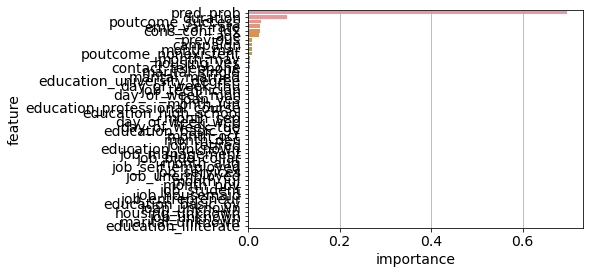

In [206]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [207]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [210]:
gscv_results = gscv_Rf.fit(X_train, y_train)
gscv_results.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   31.0s finished


1.0

In [211]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 50}

# Boosting

In [212]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [213]:
gscv_ada.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [214]:
gscv_ada.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [215]:
clf_ada = gscv_ada.best_estimator_

In [216]:
gscv_ada.best_score_

1.0

In [217]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=800)
ad.fit(X_train, y_train )

AdaBoostClassifier(learning_rate=0.1, n_estimators=800)

In [218]:
print(pd.Series(cross_val_score(clf_ada, X_train, y_train, cv=10)).describe()[['min', 'mean', 'max']])

min     1.0
mean    1.0
max     1.0
dtype: float64


In [219]:
### Gradient Boost

In [220]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [221]:
gscv_gbm.best_params_

{'learning_rate': 0.001, 'n_estimators': 600}

In [222]:
clf_gbm = gscv_gbm.best_estimator_

gscv_gbm.best_score_

1.0

In [223]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=800)
gbm.fit(X_train, y_train )

GradientBoostingClassifier(n_estimators=800)

In [225]:
print(pd.Series(cross_val_score(clf_gbm, X_train, y_train, cv=10)).describe()[['min', 'mean', 'max']])

min     1.0
mean    1.0
max     1.0
dtype: float64


# Naive Bayes

In [226]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [227]:
metrics.confusion_matrix( y_test,nb_clf.predict( X_test) )

array([[1067,   25],
       [ 113,   31]], dtype=int64)

In [228]:
metrics.accuracy_score( y_test, nb_clf.predict( X_test ) )

0.8883495145631068

#  Support Vector Machines (SVC)

In [229]:
model = SVC(kernel='rbf', class_weight='balanced')

In [230]:
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [231]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [232]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.0005}


In [233]:
model = grid.best_estimator_
yfit = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1092
           1       0.47      0.35      0.40       144

    accuracy                           0.88      1236
   macro avg       0.69      0.65      0.67      1236
weighted avg       0.87      0.88      0.87      1236



#  Artificial Neural Networks (ANN) using sklearn

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [235]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
from sklearn.neural_network import MLPClassifier

In [237]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [238]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [239]:
predictions = mlp.predict(X_test)

In [240]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1066   26]
 [ 103   41]]


In [241]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1092
           1       0.61      0.28      0.39       144

    accuracy                           0.90      1236
   macro avg       0.76      0.63      0.67      1236
weighted avg       0.88      0.90      0.88      1236



In [242]:
mlp.coefs_

[array([[ 0.21010473, -0.3243542 , -0.07158336, ...,  0.2424319 ,
          0.28543361,  0.22654467],
        [ 0.27264237, -0.18975491,  0.25284018, ..., -0.17558547,
         -0.06766327, -0.09176117],
        [ 0.08218537,  0.11971373, -0.32436266, ...,  0.02316931,
          0.08514095,  0.31930213],
        ...,
        [ 0.11073811,  0.03217123, -0.09479681, ...,  0.12019518,
          0.05878643,  0.19979669],
        [ 0.0727393 ,  0.11077389, -0.14816072, ...,  0.01677606,
         -0.08613322,  0.2344697 ],
        [ 0.37492405, -0.02669478, -0.34165793, ...,  0.06146533,
         -0.17506428, -0.1074037 ]]),
 array([[ 2.01947176e-01, -3.48392321e-01,  3.58647696e-01,
         -1.09003538e-01, -2.78444390e-01, -3.64136818e-01,
         -3.10632514e-01, -6.65447120e-02, -2.21616526e-01,
          2.44566247e-01, -1.60395226e-01, -2.75462177e-01,
          3.49450377e-01,  2.78574680e-01,  2.27249154e-01,
          2.73588317e-01,  6.60678851e-02,  1.47534588e-01,
          2.0

In [243]:
len(mlp.coefs_)

4

In [244]:
len(mlp.intercepts_[0])

30

In [ ]:
#we can add the metrics and accuracy fr all executed models in new df and save the best model with pickle